<a href="https://colab.research.google.com/github/sjayan009/25_re/blob/main/hdp_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load packages

In [1]:
import pandas as pd
from pandas import option_context
import numpy as np
import string
import re
import sys

# Sklearn
from sklearn.datasets import fetch_20newsgroups

# Plotting
import matplotlib.pyplot as plt



### Prep stopwords

In [2]:
import nltk
nltk.download('stopwords', quiet=True)

from nltk.corpus import stopwords
st_words = stopwords.words('english')
st_words.extend(['from', 'subject', 're', 'edu', 'use'])

### Read 20Newsgroup data

In [3]:
news = fetch_20newsgroups(subset='train') # import fron skleanr

In [5]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# Extend the list of stopwords
st_words = stopwords.words('english')
st_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Fetch the 20 newsgroups dataset
news = fetch_20newsgroups(subset='train')

# Create a DataFrame from the news data and target
news_df = pd.DataFrame({'topic_id': news.target, 'content': news.data})

# Convert target_names to a DataFrame
topic_names_df = pd.DataFrame({'topic_name': news.target_names})

# Merge the DataFrames on the topic_id
news_df = news_df.merge(topic_names_df, left_on='topic_id', right_index=True, how='left')

# Reset index for a clean DataFrame
news_df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
news_df.head()


,topic_id,content,topic_name
0,7,From: lerxst@wam.umd.edu (where's my thing)\nS...,rec.autos
1,4,From: guykuo@carson.u.washington.edu (Guy Kuo)...,comp.sys.mac.hardware
2,4,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,comp.sys.mac.hardware
3,1,From: jgreen@amber (Joe Green)\nSubject: Re: W...,comp.graphics
4,14,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,sci.space


In [6]:
doc_list = news_df.content.values.tolist()

In [7]:
doc_list[2]

'From: twillis@ec.ecn.purdue.edu (Thomas E Willis)\nSubject: PB questions...\nOrganization: Purdue University Engineering Computer Network\nDistribution: usa\nLines: 36\n\nwell folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985.  sooo, i\'m in the market for a\nnew machine a bit sooner than i intended to be...\n\ni\'m looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopefully) somebody can answer:\n\n* does anybody know any dirt on when the next round of powerbook\nintroductions are expected?  i\'d heard the 185c was supposed to make an\nappearence "this summer" but haven\'t heard anymore on it - and since i\ndon\'t have access to macleak, i was wondering if anybody out there had\nmore info...\n\n* has anybody heard rumors about price drops to the powerbook line like the\nones the duo\'s just went through recently?\n\n* what\'s the impression of the display on the 180?  i could probably swin

### Removing @s, new lines and single quotes

In [8]:
# Remove Emails
doc_list = [re.sub(r'\S*@\S*\s?', '', sent) for sent in doc_list]

# Remove new line characters
doc_list = [re.sub(r'\s+', ' ', sent) for sent in doc_list]

# Remove distracting single quotes
doc_list = [re.sub(r"\'", "", sent) for sent in doc_list]


In [9]:
doc_list[2]

'From: (Thomas E Willis) Subject: PB questions... Organization: Purdue University Engineering Computer Network Distribution: usa Lines: 36 well folks, my mac plus finally gave up the ghost this weekend after starting life as a 512k way back in 1985. sooo, im in the market for a new machine a bit sooner than i intended to be... im looking into picking up a powerbook 160 or maybe 180 and have a bunch of questions that (hopefully) somebody can answer: * does anybody know any dirt on when the next round of powerbook introductions are expected? id heard the 185c was supposed to make an appearence "this summer" but havent heard anymore on it - and since i dont have access to macleak, i was wondering if anybody out there had more info... * has anybody heard rumors about price drops to the powerbook line like the ones the duos just went through recently? * whats the impression of the display on the 180? i could probably swing a 180 if i got the 80Mb disk rather than the 120, but i dont really 

### Removing punctuations, lowercasing and splitting text into lists

In [10]:
# Gensim
import gensim

word_list = [gensim.utils.simple_preprocess(txt, deacc=True, min_len=3) for txt in doc_list]

In [11]:
word_list[2][:6]

['from', 'thomas', 'willis', 'subject', 'questions', 'organization']

### Bigram model to capture co-occurent words

In [12]:

from gensim.models import Phrases
from gensim.models.phrases import Phraser

bigram = Phrases(word_list, min_count=5, threshold=100)

bigram_model = Phraser(bigram)


### Remove standard and extended Stopwords

In [13]:
# Example of stop word removal process
sentence = "A letter has been written asking him to be released"
for word in sentence.split():
    if word not in st_words:
        print("Kept ==> " +word)
    else:
        print("Removed: " +word)

Kept ==> A
Kept ==> letter
Removed: has
Removed: been
Kept ==> written
Kept ==> asking
Removed: him
Removed: to
Removed: be
Kept ==> released


In [14]:
word_list_nostops = [[word for word in txt if word not in st_words] for txt in word_list]

In [15]:
word_list_nostops[2][:6]

['thomas', 'willis', 'questions', 'organization', 'purdue', 'university']

### Create Bigrams

In [16]:
word_bigrams = [bigram_model[w_vec] for w_vec in word_list_nostops]

In [17]:
word_bigrams[2][:7]

['thomas',
 'willis',
 'questions',
 'organization',
 'purdue_university',
 'engineering',
 'computer']

### Word Lemmatization

In [18]:
import spacy

## Example showing lemmatization
sentence = "A letter has been written asking him to be released"

spC = spacy.load('en_core_web_sm')

lemma_sentence = spC(sentence)
for token in lemma_sentence:
    print(token.text + " ==> " +token.lemma_ + ", " + token.pos_)

A ==> a, DET
letter ==> letter, NOUN
has ==> have, AUX
been ==> be, AUX
written ==> write, VERB
asking ==> ask, VERB
him ==> he, PRON
to ==> to, PART
be ==> be, AUX
released ==> release, VERB


In [19]:

spC = spacy.load('en_core_web_sm')
postags = ['NOUN','VERB', 'ADV', 'ADJ'] # Keep nouns, adj, verbs, and adverbs


def lemmatize(word_list, ptags = postags ):
    '''Lemmatizes words based on allowed postags, input format is list of sublists
       with strings'''

    lem_lists =[]
    for vec in word_list:
        sentence = spC(" ".join(vec))
        lem_lists.append([token.lemma_ for token in sentence if token.pos_ in ptags])

    return lem_lists


In [20]:
# Lemmatize bigrams
word_list_lemmatized = lemmatize(word_bigrams)


In [21]:
word_list_lemmatized[2][:7]

['question',
 'organization',
 'purdue_university',
 'engineering',
 'computer',
 'network',
 'line']

#### (Alternative, tried using stemming with no improvement)

In [ ]:
from gensim.parsing.porter import PorterStemmer
p = PorterStemmer()
def stemming(word_list):
    '''Lemmatizes words based on allowed postags, input format is list of sublists
       with strings'''

    lem_lists =[]
    for vec in word_list:
        lem_lists.append([p.stem(token) for token in vec])

    return lem_lists

word_list_stem = stemming(word_bigrams)

## HDP Model

<img src="imgs/HDP.png" style="width:70%; height:90%;">

In [23]:
!pip install tomotopy

import tomotopy as tp

hdp = tp.HDPModel(tw=tp.TermWeight.IDF, min_cf=5, rm_top=7,
                 gamma=1, alpha=0.1, initial_k=10, seed=99999)

# Add docs to train
for vec in word_list_lemmatized:
    hdp.add_doc(vec)

# Initiate MCMC burn-in
hdp.burn_in = 100
hdp.train(0)
print('Num docs:', len(hdp.docs), ', Vocab size:', hdp.num_vocabs, ', Num words:', hdp.num_words)
print('Removed top words:', hdp.removed_top_words)
print('Training...', file=sys.stderr, flush=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 54.9 MB/s eta 0:00:00


<ipython-input-23-e3a86e02eb7a>:14: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  hdp.train(0)
Training...


Num docs: 11314 , Vocab size: 16783 , Num words: 1093046
Removed top words: ['line', 'write', 'article', 'say', 'get', 'organization', 'know']


In [24]:
# Train model
mcmc_iter=1000
for i in range(0, mcmc_iter, 100):
    hdp.train(100, workers=3)
    print('Iteration: {}\tLog-likelihood: {}\tNum. of topics: {}'.format(i, hdp.ll_per_word, hdp.live_k))


<ipython-input-24-2b4d88f2d839>:4: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  hdp.train(100, workers=3)


Iteration: 0	Log-likelihood: -8.249980968110526	Num. of topics: 23
Iteration: 100	Log-likelihood: -8.243210439407408	Num. of topics: 23
Iteration: 200	Log-likelihood: -8.24028171098069	Num. of topics: 24
Iteration: 300	Log-likelihood: -8.23908935101431	Num. of topics: 24
Iteration: 400	Log-likelihood: -8.233079798081764	Num. of topics: 25
Iteration: 500	Log-likelihood: -8.231957503773117	Num. of topics: 25
Iteration: 600	Log-likelihood: -8.2312163942883	Num. of topics: 26
Iteration: 700	Log-likelihood: -8.231464748154572	Num. of topics: 25
Iteration: 800	Log-likelihood: -8.231940033103346	Num. of topics: 26
Iteration: 900	Log-likelihood: -8.230826715204774	Num. of topics: 25


#### Get topics

In [25]:
def get_hdp_topics(hdp, top_n=10):
    '''Wrapper function to extract topics from trained tomotopy HDP model

    ** Inputs **
    hdp:obj -> HDPModel trained model
    top_n: int -> top n words in topic based on frequencies

    ** Returns **
    topics: dict -> per topic, an arrays with top words and associated frequencies
    '''

    # Get most important topics by # of times they were assigned (i.e. counts)
    sorted_topics = [k for k, v in sorted(enumerate(hdp.get_count_by_topics()), key=lambda x:x[1], reverse=True)]

    topics=dict()

    # For topics found, extract only those that are still assigned
    for k in sorted_topics:
        if not hdp.is_live_topic(k): continue # remove un-assigned topics at the end (i.e. not alive)
        topic_wp =[]
        for word, prob in hdp.get_topic_words(k, top_n=top_n):
            topic_wp.append((word, prob))

        topics[k] = topic_wp # store topic word/frequency array

    return topics

In [26]:
hdp_topics = get_hdp_topics(hdp)

In [27]:
hdp_topics[0]

[('armenian', 0.004251490812748671),
 ('apartment', 0.004035633523017168),
 ('doctor', 0.0038534849882125854),
 ('patient', 0.0037936633452773094),
 ('food', 0.003780297003686428),
 ('disease', 0.003487266832962632),
 ('pain', 0.0033918495755642653),
 ('go', 0.003382499096915126),
 ('people', 0.0033508408814668655),
 ('msg', 0.003209349000826478)]

#### Evaluate coherence

In [28]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# Build gensim objects
vocab = corpora.Dictionary(word_list_lemmatized)
corpus = [vocab.doc2bow(words) for words in word_list_lemmatized]

# Build topic list from dictionary
topic_list=[]
for k, tups in hdp_topics.items():
    topic_tokens=[]
    for w, p in tups:
        topic_tokens.append(w)

    topic_list.append(topic_tokens)



In [29]:
topic_list[0]

['people',
 'gun',
 'think',
 'armenian',
 'believe',
 'law',
 'make',
 'government',
 'right',
 'state']

In [30]:
cm = CoherenceModel(topics=topic_list, corpus=corpus, dictionary=vocab, texts=word_list_lemmatized,
                    coherence='c_v')

cm.get_coherence()

0.617466775289605

#### Inference

In [32]:
test_doc = word_list_lemmatized[0]

doc_inst = hdp.make_doc(test_doc)

topic_dist, ll = hdp.infer(doc_inst)

topic_idx = np.array(topic_dist).argmax()
topic_idx

3

In [33]:
hdp.get_topic_words(topic_idx)

[('car', 0.009926173835992813),
 ('bike', 0.006701486650854349),
 ('ride', 0.003871497232466936),
 ('engine', 0.0031266992446035147),
 ('drive', 0.002956848591566086),
 ('motorcycle', 0.0026139975525438786),
 ('speed', 0.0024810456670820713),
 ('tire', 0.002427593804895878),
 ('road', 0.0023188218474388123),
 ('good', 0.002304299268871546)]

In [40]:
news_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_id,content,topic_name
0,7,From: lerxst@wam.umd.edu (where's my thing)\nS...,rec.autos
1,4,From: guykuo@carson.u.washington.edu (Guy Kuo)...,comp.sys.mac.hardware
2,4,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,comp.sys.mac.hardware
3,1,From: jgreen@amber (Joe Green)\nSubject: Re: W...,comp.graphics
4,14,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,sci.space


#### Word Clouds

In [ ]:
from scripts.wordcloud_funcs import hdp_topics_to_wordclouds

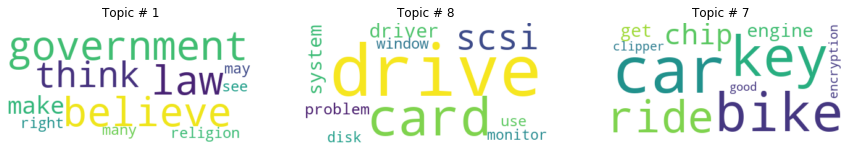

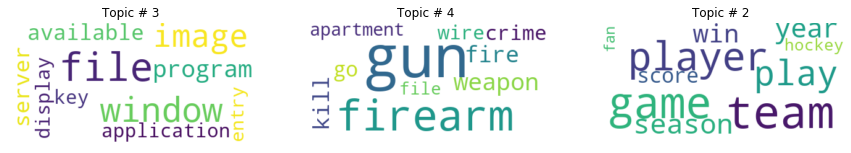

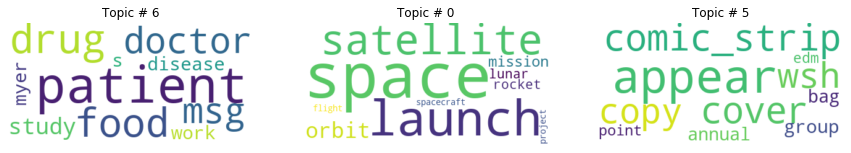

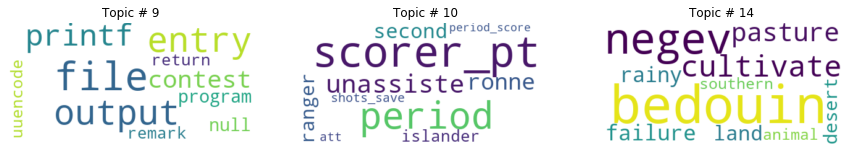

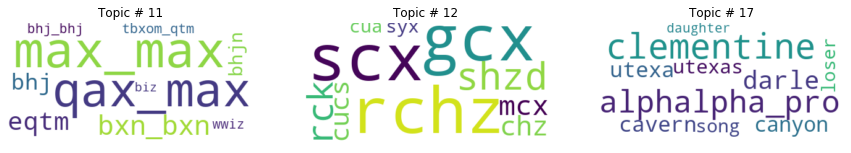

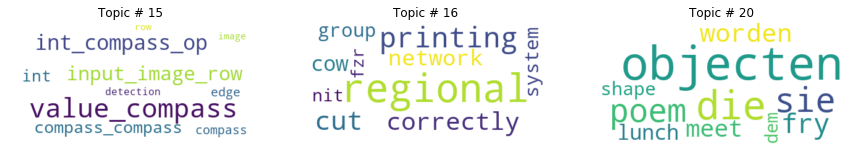

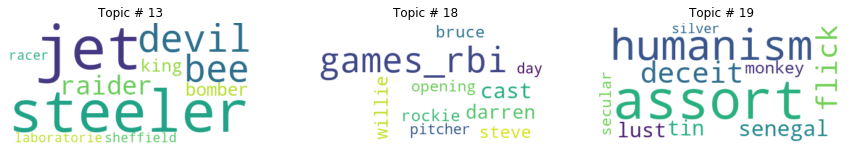

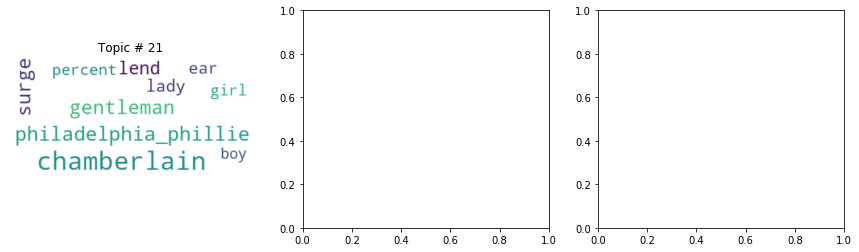

In [ ]:
hdp_topics_to_wordclouds(hdp, hdp_topics)

### Cautionary Tale 3

In [35]:
from gensim.models import HdpModel

# Filter outlier words (e.g. appear <10 docs or in over 50% of docs)
vocab = corpora.Dictionary(word_list_lemmatized)
vocab.filter_extremes(no_below=20, no_above=0.5)
vocab.compactify()

# Build corpus
corpus = [vocab.doc2bow(words) for words in word_list_lemmatized]

# Just changing the learning rate and truncation level
hdp = HdpModel(corpus, vocab, gamma=1, T=30, alpha=0.1, K=8, kappa=1, random_state=20) # default kappa
hdp08 = HdpModel(corpus, vocab, gamma=1, T=30, alpha=0.1, K=8, kappa=0.8, random_state=20)
hdp06 = HdpModel(corpus, vocab, gamma=1, T=30, alpha=0.1, K=8, kappa=0.6, random_state=20)

In [36]:
vb_model = [hdp06, hdp08, hdp]
vb_coherence =[]

for m in vb_model:
    cm = CoherenceModel(m, texts=word_list_lemmatized, corpus=corpus, dictionary=vocab, coherence='c_v')
    vb_coherence.append(cm.get_coherence())

In [37]:
pd.DataFrame(vb_coherence, index=['hdp_kap06', 'hdp_kap08', 'hdp_kap1']).T

,hdp_kap06,hdp_kap08,hdp_kap1
0,0.364872,0.422188,0.512724


In [39]:
!pip install pyLDAvis
import pyLDAvis.gensim
py_corpus = [x for x in corpus if len(x) > 0]
prep= pyLDAvis.gensim.prepare(hdp, py_corpus, vocab)
pyLDAvis.display(prep)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.8 MB/s eta 0:00:00
